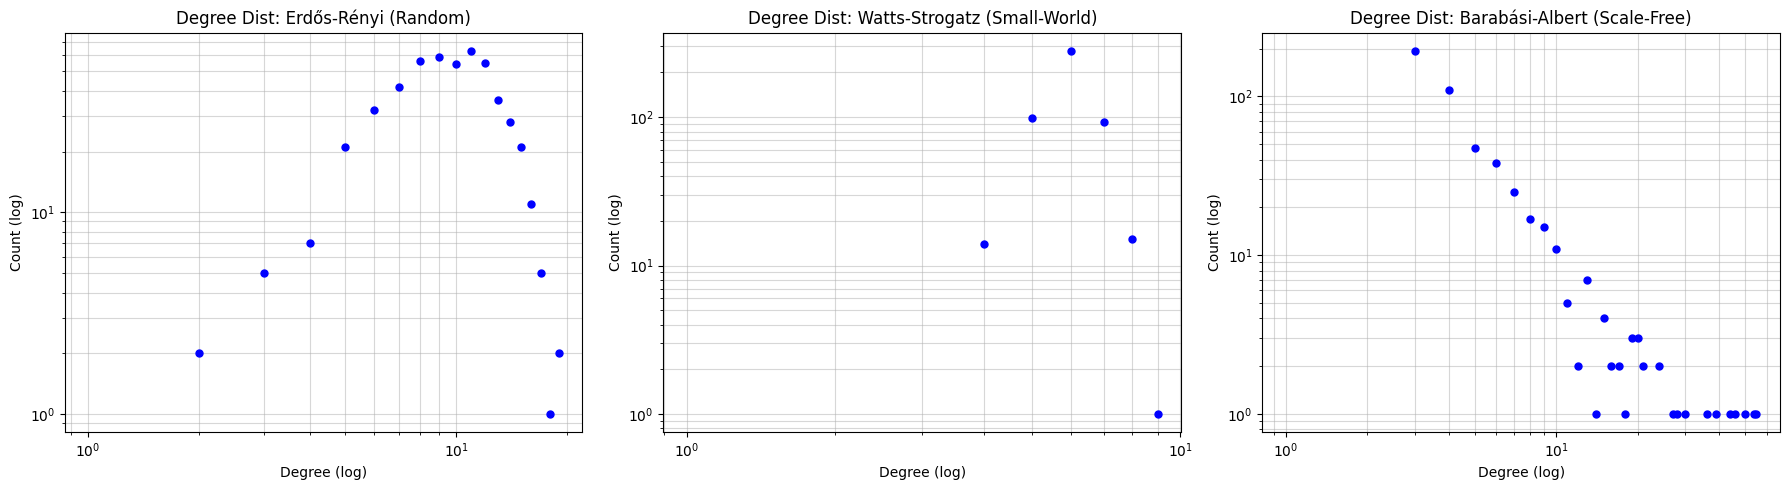

                       Model  Avg Shortest Path  Clustering Coeff
        Erdős-Rényi (Random)           2.941018          0.020148
Watts-Strogatz (Small-World)           5.314677          0.441924
Barabási-Albert (Scale-Free)           3.238381          0.044984


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


n = 500 
m = 3
p_sw = 0.1
p_er = 0.02

graphs = {
    "Erdős-Rényi (Random)": nx.erdos_renyi_graph(n, p_er),
    "Watts-Strogatz (Small-World)": nx.watts_strogatz_graph(n, k=6, p=p_sw),
    "Barabási-Albert (Scale-Free)": nx.barabasi_albert_graph(n, m)
}

results = []
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, G) in enumerate(graphs.items()):
    avg_path = nx.average_shortest_path_length(G) if nx.is_connected(G) else "N/A"
    avg_clust = nx.average_clustering(G)
    results.append({"Model": name, "Avg Shortest Path": avg_path, "Clustering Coeff": avg_clust})
    
    degrees = [d for n, d in G.degree()]
    counts = np.bincount(degrees)
    x = np.arange(len(counts))
    
    axes[i].loglog(x, counts, 'bo', markersize=5)
    axes[i].set_title(f"Degree Dist: {name}")
    axes[i].set_xlabel("Degree (log)")
    axes[i].set_ylabel("Count (log)")
    axes[i].grid(True, which="both", ls="-", alpha=0.5)

plt.tight_layout()
plt.show()

df = pd.DataFrame(results)
print(df.to_string(index=False))
